In [1]:
!git clone https://github.com/mseitzer/srgan.git

fatal: destination path 'srgan' already exists and is not an empty directory.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd '/content/srgan'


/content/srgan


In [4]:
ls

configs/  environment.yml  images/  metrics/  README.md   setup.sh*  train.py*
data/     eval.py*         LICENSE  models/   resources/  training/  utils/


In [5]:
import torch
torch.cuda.empty_cache()

In [52]:
!python ./eval.py -i configs/srgan.json resources/pretrained/srgan.pth "/content/drive/MyDrive/Colab Notebooks/YBIGTA_실습용/신입기수 프로젝트/input1_without_alpha.png"

Running on GPU 0
/content/srgan/models/weight_inits.py:101: UserWarning: nn.init.orthogonal is now deprecated in favor of nn.init.orthogonal_.
  _get_init_fn(weight_init)(m.weight.data)
/content/srgan/models/weight_inits.py:103: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  _get_init_fn(bias_init)(m.bias.data)
/content/srgan/models/weight_inits.py:101: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  _get_init_fn(weight_init)(m.weight.data)
Restored checkpoint from resources/pretrained/srgan.pth
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necess

In [53]:
import cv2

In [54]:
def concat_tile(im_list_2d):
    return cv2.vconcat([cv2.hconcat(im_list_h) for im_list_h in im_list_2d])


In [58]:
original_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/YBIGTA_실습용/신입기수 프로젝트/input1_without_alpha.png')
srgan_super_resolved_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/YBIGTA_실습용/신입기수 프로젝트/input1_without_alpha_pred.png')

In [59]:
original_img = cv2.resize(original_img, (srgan_super_resolved_img.shape[0], srgan_super_resolved_img.shape[1]))
final_img = concat_tile([[original_img, srgan_super_resolved_img]])

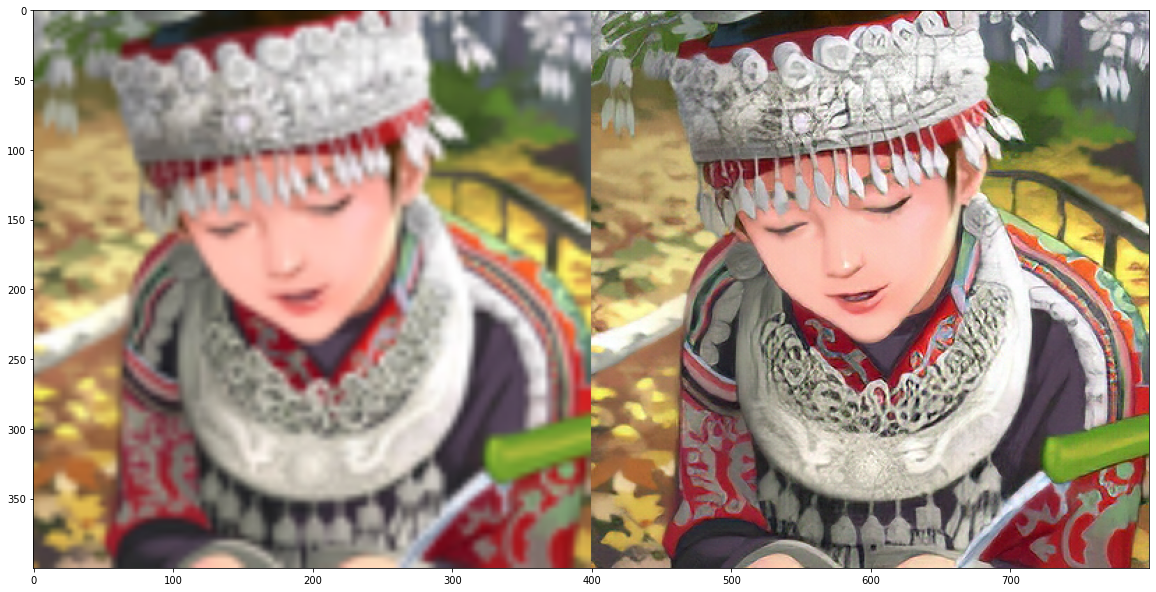

In [62]:
from matplotlib import pyplot as plt
final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
srgan_super_resolved_img = cv2.cvtColor(srgan_super_resolved_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20, 20))
plt.imshow(final_img)
plt.show()